## Calculating Dynamic topography

Set `ekey` below to plot different experiments.

In [1]:
%matplotlib inline

import pandas as pd
import cosima_cookbook as cc
import numpy as np
import matplotlib.pyplot as plt # to generate plots
import xarray as xr
import scipy as sp
import pandas as pd
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft

from dask.distributed import Client, progress

import sys, os

os.chdir(os.path.join(os.getcwd(), "ACCESS-OM2-updated/figures/dynamic_topo"))
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    #plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

## To deal with memory issues:
* In a terminal on VDI (either over VNC or through SSH and inside screen/tmux), run:
`dask-scheduler`
* This should output the scheduler address, like `tcp://10.6.1.23:8786`. 
* Now, in another terminal (ensuring that the default conda module has cosima_cookbook installed, as all workers will need access to that), run:
`dask-worker tcp://10.6.1.23:8786 --local-directory /local/g40/aek156`
* Then, make sure the following cell matches the scheduler address.

In [3]:
client = Client("tcp://10.6.1.23:8786")
client

<Client: 'tcp://10.6.1.23:8786' processes=1 threads=48, memory=188.56 GiB>

In [4]:
session = cc.database.create_session()

In [5]:
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']

darray = cc.querying.getvar(session=session, expt=expt, variable='sea_level', n=n_files)
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
sea_level = darray

Pac_SL_1deg = sea_level.sel(yt_ocean=slice(-30,-10)).sel(xt_ocean=slice(-180,-80))\
                             .mean('xt_ocean').mean('yt_ocean')
Pac_SL_1deg.load()

Tas_SL_1deg = sea_level.sel(yt_ocean=slice(-45.5,-25)).sel(xt_ocean=slice(-210,-188))\
                             .mean('xt_ocean').mean('yt_ocean')
Tas_SL_1deg.load()


<xarray.DataArray 'sea_level' (time: 720)>
array([0.2651142 , 0.27465355, 0.2697975 , 0.26550424, 0.24489623,
       0.23105676, 0.21369852, 0.21536818, 0.20758075, 0.2030653 ,
       0.21079342, 0.22359526, 0.24640734, 0.26721713, 0.2640772 ,
       0.257171  , 0.22969398, 0.21397062, 0.21148951, 0.21210138,
       0.21187757, 0.19257645, 0.19931309, 0.21493396, 0.24093793,
       0.2565572 , 0.2513124 , 0.24098787, 0.21206622, 0.19464715,
       0.1914914 , 0.18606417, 0.1880796 , 0.17782839, 0.17846224,
       0.1922193 , 0.21878532, 0.22830954, 0.2314011 , 0.22854151,
       0.1982241 , 0.18273972, 0.16786875, 0.1757278 , 0.1641922 ,
       0.17178372, 0.17864132, 0.19898324, 0.22800347, 0.241585  ,
       0.24074551, 0.22594249, 0.20337507, 0.192126  , 0.1948618 ,
       0.18778189, 0.17743482, 0.16361214, 0.16918449, 0.19350502,
       0.21744242, 0.23234905, 0.23671788, 0.22393972, 0.20576568,
       0.18434206, 0.17280778, 0.1775397 , 0.17239521, 0.16961469,
       0.1673288 , 0.18239328, 0.19176921, 0.21352312, 0.22038844,
       0.21759957, 0.20620696, 0.179882  , 0.16552284, 0.16008137,
       0.1596761 , 0.14331816, 0.14174989, 0.163928  , 0.19215713,
       0.19909507, 0.20259644, 0.19539538, 0.18430291, 0.16334541,
       0.15878928, 0.14925902, 0.14958   , 0.14615259, 0.1417199 ,
       0.16576421, 0.18399398, 0.20278463, 0.21054783, 0.19589178,
...
       0.25654823, 0.25948185, 0.24838543, 0.23457392, 0.21545601,
       0.21248981, 0.19939716, 0.19034883, 0.19663979, 0.20379455,
       0.22087201, 0.24486576, 0.26321024, 0.26015174, 0.24655199,
       0.22311758, 0.20847657, 0.18408373, 0.18908687, 0.18566734,
       0.17610788, 0.1842047 , 0.19982615, 0.22180866, 0.2405901 ,
       0.24790126, 0.24659607, 0.22678232, 0.20499066, 0.21152574,
       0.19763586, 0.19439667, 0.18957278, 0.1987472 , 0.22003543,
       0.24492657, 0.2664795 , 0.2716846 , 0.26585394, 0.23848422,
       0.21972089, 0.22098394, 0.21478435, 0.21239072, 0.20793983,
       0.20212905, 0.21481268, 0.2430028 , 0.2609489 , 0.2722355 ,
       0.26245925, 0.24272871, 0.23748815, 0.21459307, 0.21662799,
       0.20005557, 0.20005998, 0.1987547 , 0.21856377, 0.24560888,
       0.2649498 , 0.26665702, 0.2616099 , 0.23897488, 0.22660339,
       0.217861  , 0.21131334, 0.20475014, 0.21776636, 0.21918008,
       0.23380548, 0.2479057 , 0.26918465, 0.2775193 , 0.27613604,
       0.25989452, 0.24307878, 0.23702808, 0.23507643, 0.23410992,
       0.2280042 , 0.23076323, 0.24933302, 0.26897997, 0.28750768,
       0.29486886, 0.28238207, 0.26536122, 0.2537744 , 0.23788148,
       0.22572061, 0.21017149, 0.21384305, 0.21878879, 0.24075797],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-17T12:00:00 ... 2017-12-16T12:00:00

In [6]:
%%time
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']

darray = cc.querying.getvar(session=session, expt=expt, variable='sea_level', n=n_files)
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
sea_level = darray
Pac_SL_025deg = sea_level.sel(yt_ocean=slice(-30,-10)).sel(xt_ocean=slice(-180,-80))\
                             .mean('xt_ocean').mean('yt_ocean')
Pac_SL_025deg.load()

Tas_SL_025deg = sea_level.sel(yt_ocean=slice(-45.5,-25)).sel(xt_ocean=slice(-210,-188))\
                             .mean('xt_ocean').mean('yt_ocean')
Tas_SL_025deg.load()

CPU times: user 1.67 s, sys: 212 ms, total: 1.89 s
Wall time: 1min 30s


<xarray.DataArray 'sea_level' (time: 720)>
array([0.32401794, 0.3382653 , 0.3316325 , 0.3353097 , 0.3208747 ,
       0.30387136, 0.28482294, 0.28814867, 0.2685403 , 0.26948994,
       0.27371952, 0.28594047, 0.30961984, 0.32946983, 0.33934122,
       0.33541095, 0.31150317, 0.29266715, 0.2887205 , 0.2797847 ,
       0.28315622, 0.26509368, 0.2730101 , 0.2894105 , 0.31326512,
       0.32981142, 0.3235934 , 0.32233214, 0.2963857 , 0.26869315,
       0.2657904 , 0.26225165, 0.26197255, 0.25127032, 0.25294432,
       0.26591647, 0.2908472 , 0.3012004 , 0.30527687, 0.3029298 ,
       0.27629992, 0.26395795, 0.24138837, 0.24629001, 0.24140312,
       0.24517535, 0.25025877, 0.27106234, 0.30520782, 0.31700075,
       0.31209958, 0.30102542, 0.28017795, 0.26640975, 0.2644584 ,
       0.2590818 , 0.24978933, 0.24167942, 0.24426083, 0.26409793,
       0.28979185, 0.3061821 , 0.31121   , 0.30143788, 0.28732228,
       0.26329708, 0.25025424, 0.2574282 , 0.25227565, 0.24683522,
       0.24821067, 0.26370463, 0.27486366, 0.29360935, 0.3013854 ,
       0.29931504, 0.28644776, 0.26269132, 0.2413433 , 0.23187551,
       0.22981043, 0.21521533, 0.21723086, 0.23334788, 0.25465724,
       0.26369673, 0.2768182 , 0.2696799 , 0.25745645, 0.23807533,
       0.22397655, 0.22270063, 0.22409856, 0.22014283, 0.21281226,
       0.23590064, 0.25178614, 0.27068347, 0.28236333, 0.2688759 ,
...
       0.31802586, 0.32202062, 0.31663546, 0.29733294, 0.27651578,
       0.27191374, 0.26352173, 0.2544528 , 0.25315106, 0.26299024,
       0.28573743, 0.3084686 , 0.32330012, 0.32626152, 0.31531876,
       0.28648242, 0.27112392, 0.24952748, 0.2544528 , 0.24671473,
       0.23718384, 0.24547164, 0.26392642, 0.2859032 , 0.3025689 ,
       0.31078833, 0.30599692, 0.29061887, 0.2722651 , 0.27647424,
       0.25928748, 0.25903895, 0.25475186, 0.25742403, 0.28466716,
       0.3095672 , 0.32728794, 0.3399269 , 0.33266005, 0.30911294,
       0.291515  , 0.2895586 , 0.27783707, 0.27834743, 0.27394634,
       0.2664452 , 0.28540474, 0.31218085, 0.3321265 , 0.3436277 ,
       0.3395196 , 0.32117862, 0.31299734, 0.28750327, 0.28299245,
       0.2719141 , 0.2663516 , 0.27128378, 0.29084188, 0.32042053,
       0.33436117, 0.33991066, 0.33463216, 0.31816876, 0.30055293,
       0.29141685, 0.28296322, 0.2722265 , 0.28888524, 0.29312283,
       0.3121955 , 0.32354635, 0.34794775, 0.3557261 , 0.35426843,
       0.34159508, 0.32510582, 0.31499305, 0.30916005, 0.309047  ,
       0.3005167 , 0.29878643, 0.3193339 , 0.34292555, 0.35928285,
       0.36515313, 0.34835568, 0.3325817 , 0.32169634, 0.30889267,
       0.29727077, 0.27873513, 0.28262454, 0.28350836, 0.30734998],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-15T12:00:00 ... 2017-12-14T12:00:00

In [8]:
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']

darray = cc.querying.getvar(session=session, expt=expt, variable='eta_t', n=n_files, frequency='1 daily')
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
sea_level = darray
Pac_SL_01deg = sea_level.sel(yt_ocean=slice(-30,-10)).sel(xt_ocean=slice(-180,-80))\
                             .mean('xt_ocean').mean('yt_ocean')
Pac_SL_01deg.load()

Tas_SL_01deg = sea_level.sel(yt_ocean=slice(-45.5,-25)).sel(xt_ocean=slice(-210,-188))\
                             .mean('xt_ocean').mean('yt_ocean')
Tas_SL_01deg.load()

<xarray.DataArray 'eta_t' (time: 12053)>
array([0.30923828, 0.3064868 , 0.31215537, ..., 0.3504829 , 0.34432745,
       0.34228584], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1984-12-30T12:00:00 ... 2017-12-29T12:00:00

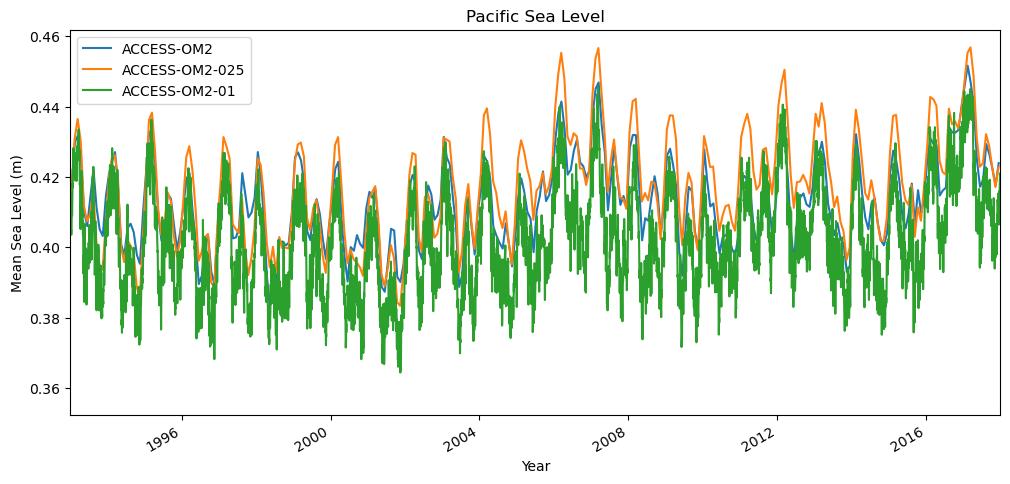

In [9]:
plt.figure(figsize=(12,5))
Pac_SL_1deg.plot(label='ACCESS-OM2')
Pac_SL_025deg.plot(label='ACCESS-OM2-025')
Pac_SL_01deg.plot(label='ACCESS-OM2-01')
plt.xlim([exptdata.clim_tstart,exptdata.clim_tend])
plt.ylabel('Mean Sea Level (m)')
plt.xlabel('Year')
plt.title('Pacific Sea Level')
plt.legend()

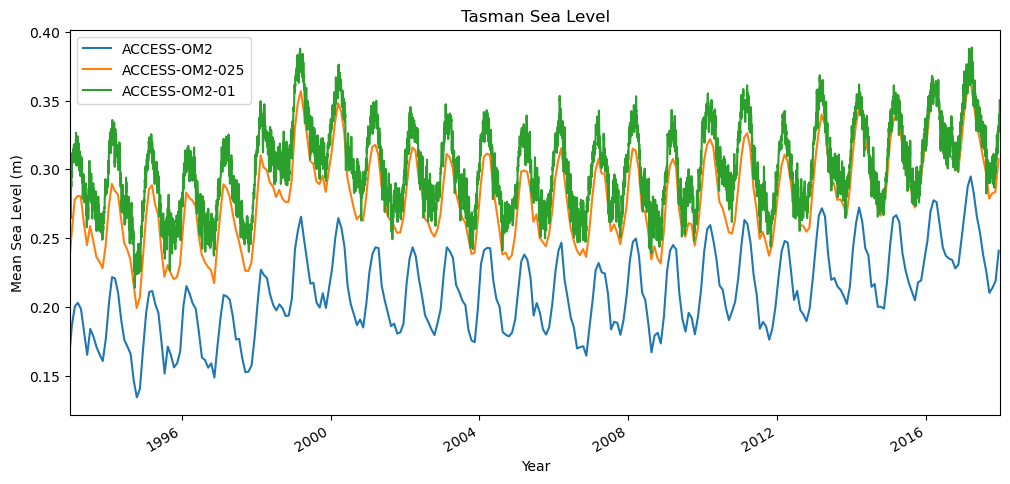

In [10]:
plt.figure(figsize=(12,5))
Tas_SL_1deg.plot(label='ACCESS-OM2')
Tas_SL_025deg.plot(label='ACCESS-OM2-025')
Tas_SL_01deg.plot(label='ACCESS-OM2-01')
plt.xlim([exptdata.clim_tstart,exptdata.clim_tend])
plt.ylabel('Mean Sea Level (m)')
plt.xlabel('Year')
plt.title('Tasman Sea Level')
plt.legend()